# Operacje dwuarguentowe i sąsiedztwa

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.util import random_noise

!WAŻNE! Aby poniższy plik działał na Google Colab, należy wgrać plik 'lena_gray.bmp' oraz 'testing.bmp'. Z panelu po lewej stronie wybieramy ikonę folderu ('Files') a następnie 'Upload' i wybieramy zdjęcie (wcześniej ściągnięte na dysk twardy z UBI).

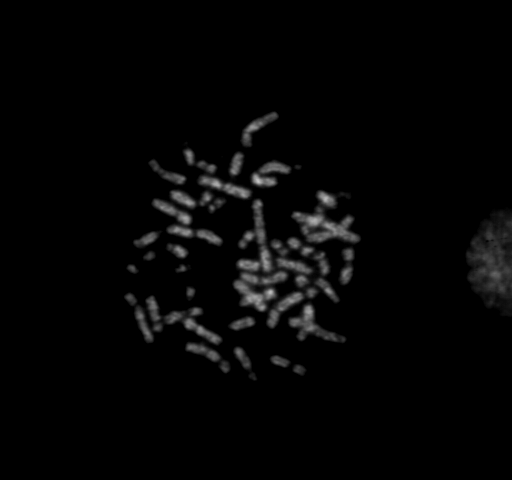

In [ ]:
# Wczytanie obrazu pierwotnego
#img = cv2.imread('lena_gray.bmp', cv2.IMREAD_GRAYSCALE)
img = cv2.imread('RED1.TIF', cv2.IMREAD_GRAYSCALE)
cv2_imshow(img)

# Uśrednianie obrazów

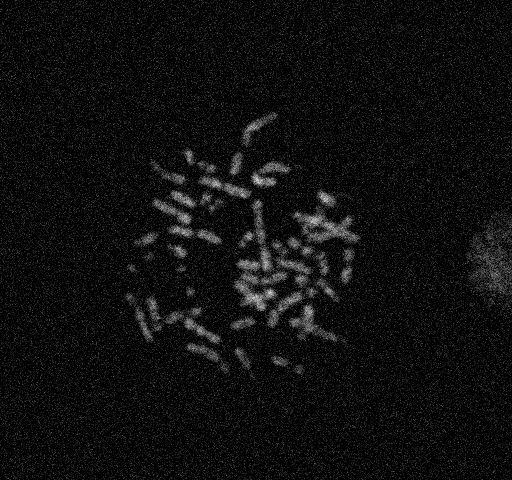

In [ ]:
# przykładowe zaszumienie obrazu szmem gaussowskim
img_noisy = random_noise(img, mode='gaussian', seed=None)
noise_img = np.array(255*img_noisy, dtype = 'uint8')
cv2_imshow(noise_img)

In [ ]:
def gen_noisy_img (img):
  img_noisy = random_noise(img, mode='gaussian', seed=None)
  noise_img = np.array(255*img_noisy, dtype = 'float64')
  return noise_img

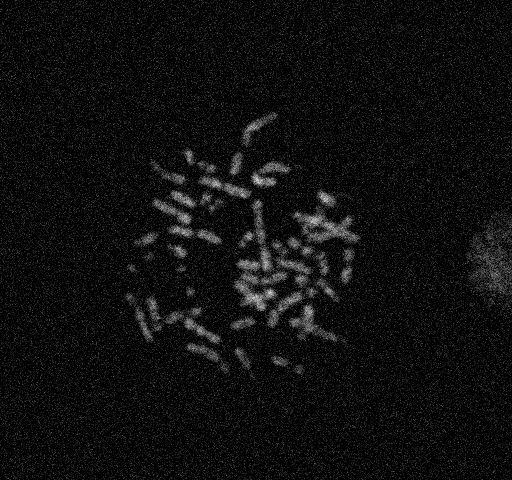

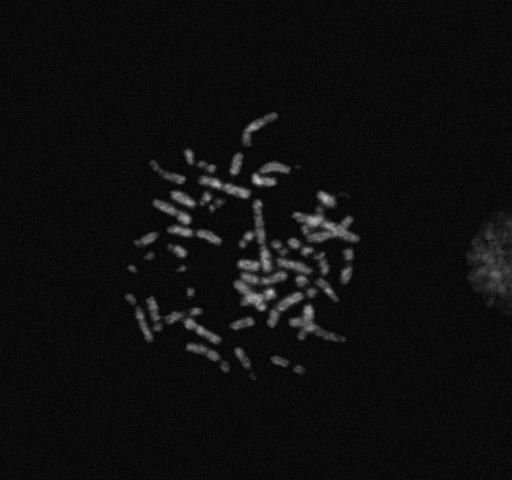

In [ ]:
# tworzymy obraz do akumulcji danych do obliczenia sredniej
img_accumulated = np.zeros_like(img,np.float)

# sumujemy zaszumione obrazy
K = 25
for k in range(K):
  img_accumulated = img_accumulated + gen_noisy_img(img)

# dzielimy przez liczbe obrazow
img_mean = img_accumulated / K
# wyswietlanie obrazu
cv2_imshow(noise_img)
cv2_imshow(img_mean)


# Op sąsiedztwa

## Filtracja dolnoprzepustowa

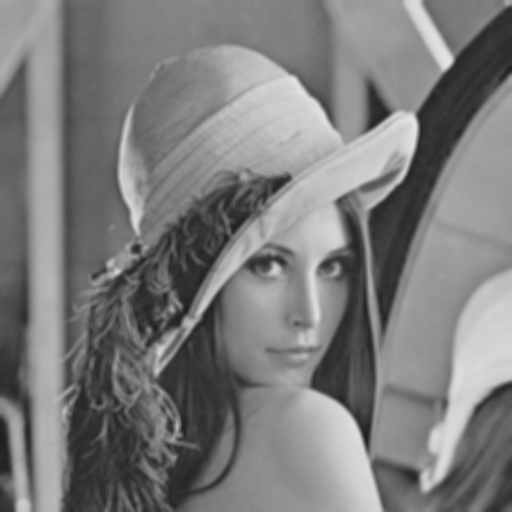

In [ ]:
# ustawienie rozmiaru maski - okna przekształcenia (kernel) 
kernel_size = (5,5)
# standardowe wygładzanie liniowe funkcją blur z biblioteki OpenCV przy użyciu powyższego rozmiaru maski
blured_img = cv2.blur(img,kernel_size)

cv2_imshow(blured_img)

Funkcja blur używa maski przekształcenia w postaci:

![alt text](https://drive.google.com/uc?id=11XviYURLSpjIyhS291KwVBtklgkDQP_B)

czyli tzw. normalized box filter.
Dla przypomnienia im większe okno tym większe rozmycie.

In [ ]:
# funkcja ta może przyjąć jako dodatkowy parametr określenie metody ekstrapolacji wartości brzegowych obrazu
blured_img = cv2.blur(img,(5,5), borderType = cv2.BORDER_REPLICATE)

# pozostałe opcje do zaimplementowania:
# 1.	pozostawienie wartości pikseli brzegowych bez zmian (cv2.BORDER_ISOLATED), 
# 2.	powielenie wartości pikseli brzegowych przez odbicie lustrzane (cv2.BORDER_REFLECT), 
# 3.	powielenie wartości pikseli brzegowych przez powielenie skrajnego piksela (cv2.BORDER_REPLICATE)

## Filtr medianowy

Opracja filtracji medianowej również może być w prosty sposób zrealizowana przy użyciu biblioteki OpenCV.  Podobnie jak w przykładach powyżej, argumenty wejściowe, prócz obrazu wejściowego, to rozmiar filtra. 
**Uwaga!** Należy pamiętać, że rozmiar okna musi mieć nieprzystą wartość całkowitą większą od 1, np.: 3, 5, 7 itd.

Ponadto, w obrazach wielokanałowych każdy kanał jest przetwarzany odrębnie.

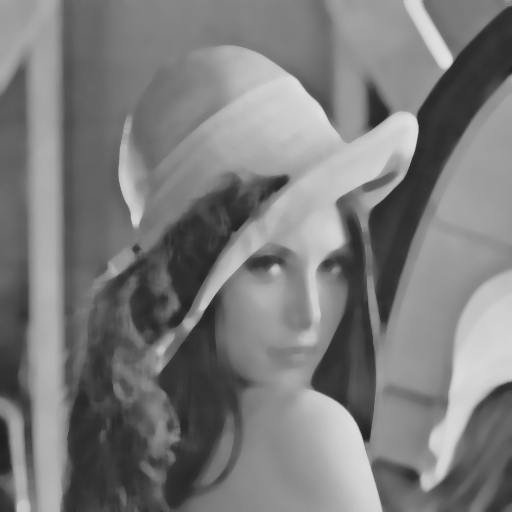

In [ ]:
medianBlured_img = cv2.medianBlur(img, 11) 

cv2_imshow(medianBlured_img)

# Operacje jednopunktowe dwuargumentowe

**Uwaga!** przy operacjach jednopunktowych dwuargumentowych należy zadbać aby oba obrazy miały ten sam rozmiar. Jeśli występuje niezgodność można zastosować jedną z dwóch opcji:
* resize = przeskalowanie
* padding = dopełnienie (np. wartością zero)

---

Aby program zadziałał należy dodać plik 'testing.bmp' (dostępny na UBI) tak samo jak obraz Leny.

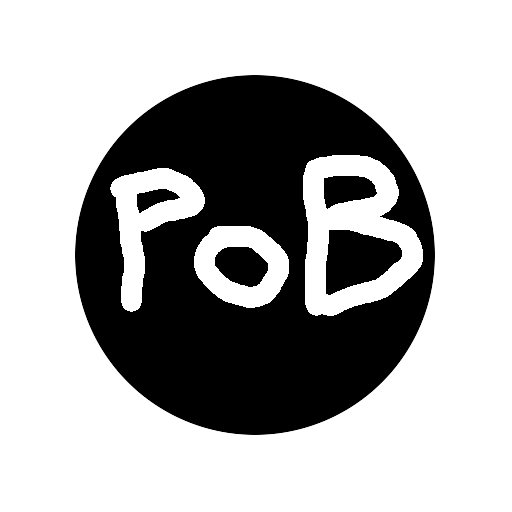

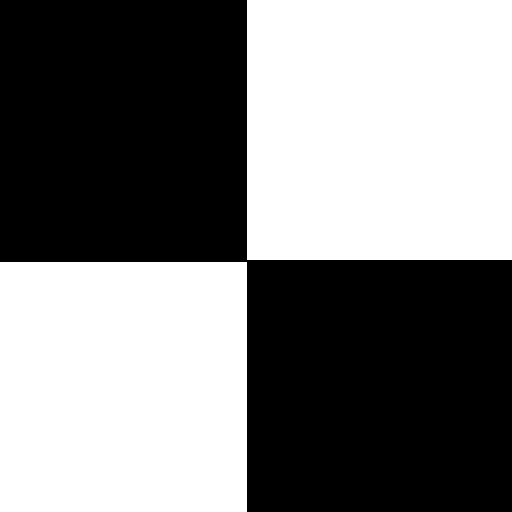

In [ ]:
# wczytanie drugiego obrazu
img1 = cv2.imread('test_logic1.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('test_logic2.png', cv2.IMREAD_GRAYSCALE)
# zmiana rozmiaru (dopasowanie) do obrazu Leny
img2 = cv2.resize(img2, img1.shape) 
cv2_imshow(img1)
cv2_imshow(img2)

### Dodawanie

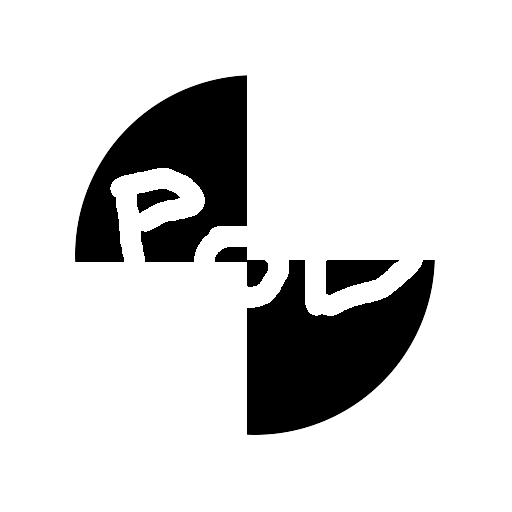

In [ ]:
# dodawanie obrazów realizowane w bibliotece OpenCV
img_add = cv2.add(img1, img2)
cv2_imshow(img_add)

### Mieszanie (blending)

"Mieszanie" pozwala na doddanie do siebie obrazów z zadaną wagą dla każdego z nich. Pozwala to na uzyskanie efektu prześwitywania lub tworzenia tzw. 'overlay'. Dodatkowo pozwala również na dodanie zadanej wartości do każdej sumy (parametr gamma). Relizowane jest zgodnie z poniższym wzorem:

![alt text](https://drive.google.com/uc?id=1H7bMNyXqRng1Cb8LhvKR7INgkZRFlANa)



gdzie:
* alpha określa udział obrazu pierwszego
* beta określa udział obrazu drugiego
* gamma określa skalar dodany do każdego sumowanego piksela (wartość dodatnia lub ujemna)


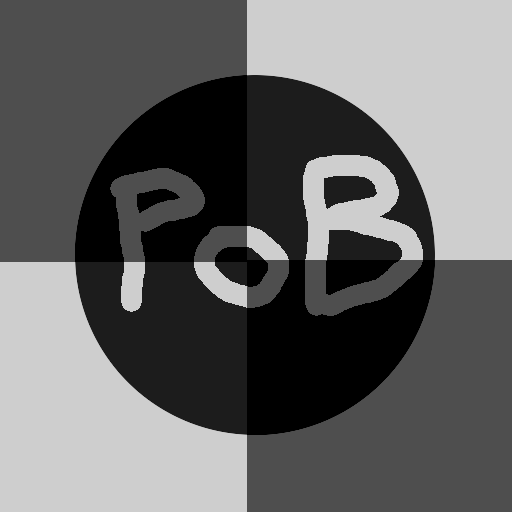

In [ ]:
# przykład zastosowania
img_blend = cv2.addWeighted(img1,0.7,img2,0.5,-100)
cv2_imshow(img_blend)

## Operacje logiczne

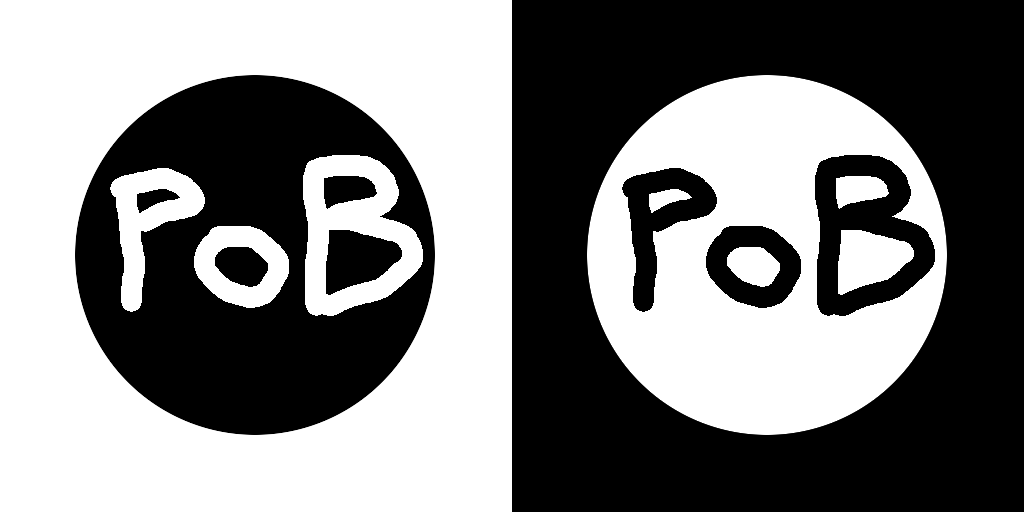

In [ ]:
# negacja = bitwise NOT
img_inv = cv2.bitwise_not(img1)

frame = cv2.hconcat((img1, img_inv))
cv2_imshow(frame)

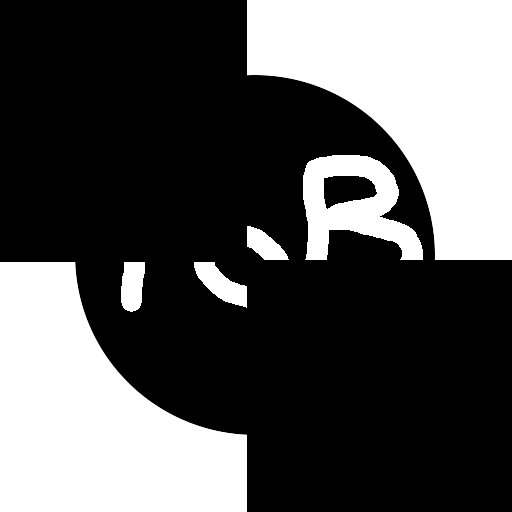

In [ ]:
# AND
img_and = cv2.bitwise_and(img1, img2)
cv2_imshow(img_and)

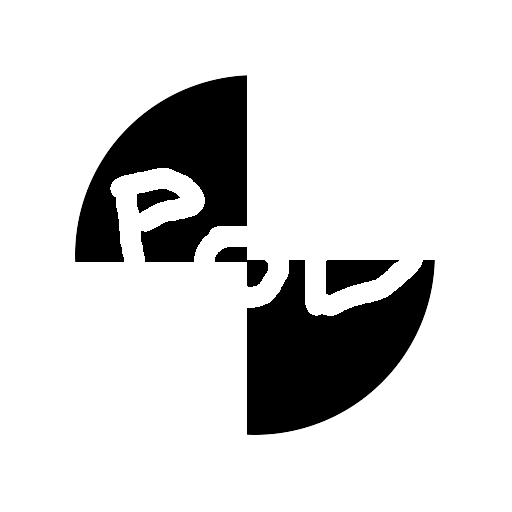

In [ ]:
# OR
img_or = cv2.bitwise_or(img1, img2)
cv2_imshow(img_or)

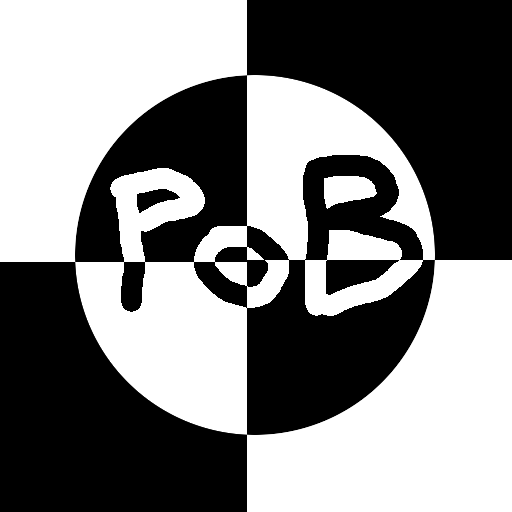

In [ ]:
# XOR
img_xor = cv2.bitwise_xor(img1, img2)
cv2_imshow(img_xor)